In [1]:
pwd

'/home/samuel'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
train = pd.read_csv(("~/Documents/Books/DataScience/Datasets/Financial Inclusion in Africa/Train_v2.csv"), index_col='uniqueid')
test = pd.read_csv("~/Documents/Books/DataScience/Datasets/Financial Inclusion in Africa/Test_v2.csv")
submission = pd.read_csv("~/Documents/Books/DataScience/Datasets/Financial Inclusion in Africa/SubmissionFile.csv")

In [5]:
Train = train.copy()
Test = test.copy()
Train.head()

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
uniqueid,,,,,,,,,,,,
uniqueid_1,Kenya,2018,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
uniqueid_2,Kenya,2018,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
uniqueid_3,Kenya,2018,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
uniqueid_4,Kenya,2018,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
uniqueid_5,Kenya,2018,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [7]:
Test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [8]:
Test.tail()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
10081,Uganda,2018,uniqueid_2998,Rural,No,2,62,Female,Spouse,Married/Living together,Primary education,Self employed
10082,Uganda,2018,uniqueid_2999,Urban,Yes,8,42,Male,Head of Household,Married/Living together,Primary education,Self employed
10083,Uganda,2018,uniqueid_3000,Urban,Yes,1,39,Male,Head of Household,Single/Never Married,Secondary education,Other Income
10084,Uganda,2018,uniqueid_3001,Rural,Yes,6,28,Female,Spouse,Married/Living together,Primary education,Self employed
10085,Uganda,2018,uniqueid_3002,Urban,Yes,7,16,Male,Other relative,Single/Never Married,Secondary education,Other Income


In [9]:
Train.job_type.unique()

array(['Self employed', 'Government Dependent',
       'Formally employed Private', 'Informally employed',
       'Formally employed Government', 'Farming and Fishing',
       'Remittance Dependent', 'Other Income',
       'Dont Know/Refuse to answer', 'No Income'], dtype=object)

In [10]:
Train.education_level.unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA'], dtype=object)

In [11]:
Train.isnull().any(), Test.isnull().any()

(country                   False
 year                      False
 bank_account              False
 location_type             False
 cellphone_access          False
 household_size            False
 age_of_respondent         False
 gender_of_respondent      False
 relationship_with_head    False
 marital_status            False
 education_level           False
 job_type                  False
 dtype: bool,
 country                   False
 year                      False
 uniqueid                  False
 location_type             False
 cellphone_access          False
 household_size            False
 age_of_respondent         False
 gender_of_respondent      False
 relationship_with_head    False
 marital_status            False
 education_level           False
 job_type                  False
 dtype: bool)

In [12]:
s = Train.dtypes == 'object'
cat_col = list(s[s].index)
cat_col

['country',
 'bank_account',
 'location_type',
 'cellphone_access',
 'gender_of_respondent',
 'relationship_with_head',
 'marital_status',
 'education_level',
 'job_type']

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
label_Train = Train.copy()
label_Test = Test.copy()
catcol = [col for col in label_Test.columns if label_Test[col].dtype == 'object']
for col in cat_col:
    label_Train[col] = encoder.fit_transform(Train[col])
for col in catcol: 
    label_Test[col] = encoder.fit_transform(Test[col])

In [14]:
label_Train.head()

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
uniqueid,,,,,,,,,,,,
uniqueid_1,0,2018,1,0,1,3,24,0,5,2,3,9
uniqueid_2,0,2018,0,0,0,5,70,0,1,4,0,4
uniqueid_3,0,2018,1,1,1,5,26,1,3,3,5,9
uniqueid_4,0,2018,0,0,1,5,34,0,1,2,2,3
uniqueid_5,0,2018,0,1,0,8,26,1,0,3,2,5


In [12]:
label_Train.tail()

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
uniqueid,,,,,,,,,,,,
uniqueid_2113,3,2018,0,0,1,4,48,0,1,0,0,7
uniqueid_2114,3,2018,0,0,1,2,27,0,1,3,3,7
uniqueid_2115,3,2018,0,0,1,5,27,0,4,4,2,7
uniqueid_2116,3,2018,0,1,1,7,30,0,4,0,3,9
uniqueid_2117,3,2018,0,0,1,10,20,1,0,3,3,6


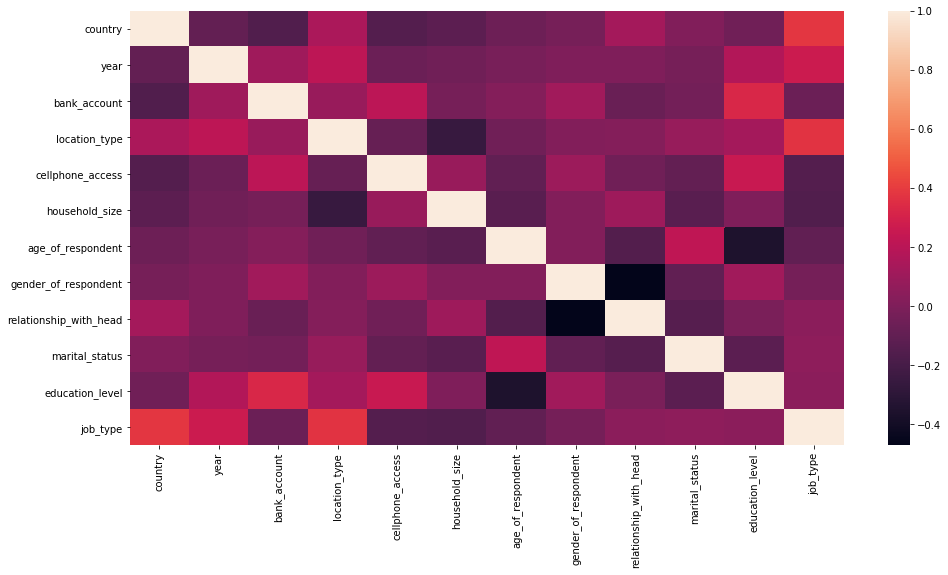

In [15]:
plt.figure(figsize=(16,8))
d = label_Train.corr('pearson')
sns.heatmap(d)

In [16]:
label_Train.head()

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
uniqueid,,,,,,,,,,,,
uniqueid_1,0,2018,1,0,1,3,24,0,5,2,3,9
uniqueid_2,0,2018,0,0,0,5,70,0,1,4,0,4
uniqueid_3,0,2018,1,1,1,5,26,1,3,3,5,9
uniqueid_4,0,2018,0,0,1,5,34,0,1,2,2,3
uniqueid_5,0,2018,0,1,0,8,26,1,0,3,2,5


In [17]:
label_Test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2018,3382,1,1,3,30,1,1,2,3,2
1,0,2018,3383,1,1,7,51,1,1,2,5,3
2,0,2018,3384,0,0,3,77,0,4,2,0,8
3,0,2018,3385,0,0,6,39,0,1,2,2,8
4,0,2018,3386,1,0,3,16,1,0,3,3,8


In [23]:
y = label_Train.bank_account
n_train = label_Train[['country','year','location_type','cellphone_access','household_size','age_of_respondent','gender_of_respondent','relationship_with_head','marital_status','education_level','job_type']]
X = n_train
X.head()

,country,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
uniqueid,,,,,,,,,,,
uniqueid_1,0,2018,0,1,3,24,0,5,2,3,9
uniqueid_2,0,2018,0,0,5,70,0,1,4,0,4
uniqueid_3,0,2018,1,1,5,26,1,3,3,5,9
uniqueid_4,0,2018,0,1,5,34,0,1,2,2,3
uniqueid_5,0,2018,1,0,8,26,1,0,3,2,5


In [19]:
y.head()

uniqueid
uniqueid_1    1
uniqueid_2    0
uniqueid_3    1
uniqueid_4    0
uniqueid_5    0
Name: bank_account, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y, train_size=0.7, random_state=42)
X_train.shape, y_train.shape, X_val.shape, y_val.shape, n_train.shape, label_Train.shape

((16466, 11), (16466,), (7058, 11), (7058,), (23524, 11), (23524, 12))

In [25]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
CV_estimator = RandomForestClassifier(random_state=42)
CV_estimator.fit(X_train, y_train)
CV_selector = RFECV(CV_estimator, cv=5, step=1, scoring='accuracy')
CV_selector.fit(X_train, y_train)
rfecv_mask = CV_selector.get_support()

Optimal number of features:  2
Best features: ['age_of_respondent', 'education_level']


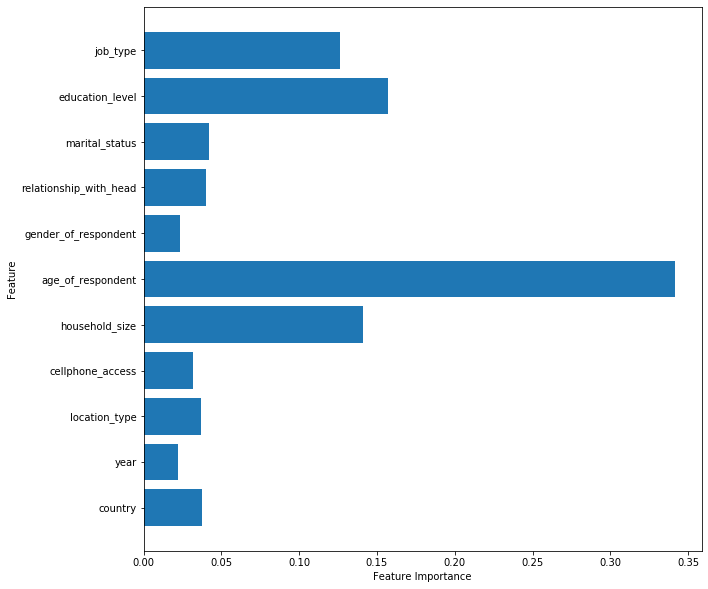

In [30]:
rfecv_features = []
for bool, features in zip(rfecv_mask, X_train.columns):
    if bool:
        rfecv_features.append(features)
print('Optimal number of features: ', CV_selector.n_features_)
print('Best features:', rfecv_features)
n_features = X_train.shape[1]
plt.figure(figsize=(10,10))
plt.barh(range(n_features), CV_estimator.feature_importances_, align='center')
plt.yticks(np.arange(n_features),X_train.columns.values)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In [31]:
X_n = label_Train[['age_of_respondent', 'education_level', 'job_type','household_size']]
y = label_Train.bank_account
X_t, X_v, y_t, y_v = train_test_split(X_n, y, train_size=0.7, random_state=42, shuffle=False)
X_t.shape, X_v.shape, y_t.shape, y_v.shape

((16466, 4), (7058, 4), (16466,), (7058,))

In [32]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators = 1500, learning_rate=0.25)
model.fit(X_n, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1500, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [33]:
model.score(X_n, y)

0.9164257779289237

In [34]:
RandomForestClassifier()
model1 = RandomForestClassifier(random_state=42)
model1.fit(X_n, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [35]:
model1.score(X_n, y)

0.9247151844924333

In [36]:
N_label_test = pd.DataFrame({'age_of_respondent': label_Test['age_of_respondent'],
                             'education_level':label_Test['education_level'],
                             'job_type':label_Test['job_type'],
                             'household_size':label_Test['household_size']})
N_label_test.head()

,age_of_respondent,education_level,job_type,household_size
0,30,3,2,3
1,51,5,3,7
2,77,0,8,3
3,39,2,8,6
4,16,3,8,3


In [42]:
y_pred = model1.predict(N_label_test)
predictions = [round(value) for value in y_pred]
predictions

[0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [44]:
submission.head()

,uniqueid,bank_account
0,uniqueid_7867 x Kenya,1.0
1,uniqueid_6722 x Kenya,0.0
2,uniqueid_6714 x Kenya,1.0
3,uniqueid_8103 x Kenya,1.0
4,uniqueid_8657 x Kenya,1.0


In [45]:
submission.tail()

,uniqueid,bank_account
10081,uniqueid_2311 x Uganda,NaN
10082,uniqueid_2921 x Uganda,NaN
10083,uniqueid_2280 x Uganda,NaN
10084,uniqueid_2285 x Uganda,NaN
10085,uniqueid_2068 x Uganda,NaN


In [46]:
submission['uniqueid'] = Test['uniqueid'] + ' x ' + Test['country']
submission.head(
)

,uniqueid,bank_account
0,uniqueid_6056 x Kenya,1.0
1,uniqueid_6060 x Kenya,0.0
2,uniqueid_6065 x Kenya,1.0
3,uniqueid_6072 x Kenya,1.0
4,uniqueid_6073 x Kenya,1.0


In [47]:
submission.tail()

,uniqueid,bank_account
10081,uniqueid_2998 x Uganda,NaN
10082,uniqueid_2999 x Uganda,NaN
10083,uniqueid_3000 x Uganda,NaN
10084,uniqueid_3001 x Uganda,NaN
10085,uniqueid_3002 x Uganda,NaN


In [49]:
submit= pd.DataFrame({'unique_id':submission["uniqueid"],'bank_acccount':y_pred})
submit.to_csv("submit.csv",index=False)

In [50]:
sub = pd.read_csv('submit.csv')
sub.head()

,unique_id,bank_acccount
0,uniqueid_6056 x Kenya,0
1,uniqueid_6060 x Kenya,1
2,uniqueid_6065 x Kenya,0
3,uniqueid_6072 x Kenya,0
4,uniqueid_6073 x Kenya,0


In [51]:
sub.tail()

,unique_id,bank_acccount
10081,uniqueid_2998 x Uganda,0
10082,uniqueid_2999 x Uganda,0
10083,uniqueid_3000 x Uganda,0
10084,uniqueid_3001 x Uganda,0
10085,uniqueid_3002 x Uganda,0
